In [1]:
#Importing the relevant data
import pandas as pd
import os

data = pd.read_csv('data'+os.path.sep+'ammoniagrowthcurve11_8 (0001).csv')
layout = pd.read_csv('data'+os.path.sep+'Layout_ammoniagrowthcurve11_8.csv')

print(data)

   Kinetic read     A1     A2     A3     A4     A5     A6     A7     A8  \
0       0:29:29  0.097  0.103  0.090  0.098  0.096  0.100  0.099  0.094   
1       0:59:29  0.095  0.105  0.090  0.103  0.101  0.104  0.102  0.097   
2       1:29:29  0.121  0.107  0.091  0.105  0.102  0.106  0.102  0.098   
3       1:59:29  0.123  0.109  0.093  0.107  0.104  0.109  0.104  0.099   
4       2:29:29  0.132  0.113  0.094  0.112  0.108  0.113  0.107  0.102   
5       2:59:29  0.144  0.118  0.096  0.118  0.114  0.120  0.113  0.106   
6       3:29:29  0.145  0.126  0.097  0.129  0.123  0.131  0.121  0.113   
7       3:59:29  0.139  0.134  0.098  0.145  0.137  0.147  0.136  0.125   
8       4:29:29  0.160  0.142  0.099  0.168  0.155  0.171  0.159  0.145   
9       4:59:29  0.168  0.150  0.101  0.199  0.180  0.203  0.193  0.174   
10      5:29:29  0.169  0.153  0.103  0.240  0.213  0.249  0.247  0.209   
11      5:59:29  0.158  0.157  0.106  0.300  0.260  0.316  0.298  0.258   
12      6:29:29  0.158  0

In [2]:
# Defining the experimental conditions/categories
strains = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
conditions = ['0g/L', '0.5g/L', '5g/L', '7.5g/L']
categories = []
for strain in strains:
    for condition in conditions:
        categories.append((strain, condition))
column_names_categories = {} # Initialize an empty dictionary for linking the experimental conditions to the column names
for i, name in enumerate(categories): # Loop over all categories and generate the associated column names
    idx = i%4
    column_names_categories[name] = [name[0]+str(idx*3+1), name[0]+str(idx*3+2), name[0]+str(idx*3+3)]

print(column_names_categories)

{('A', '0g/L'): ['A1', 'A2', 'A3'], ('A', '0.5g/L'): ['A4', 'A5', 'A6'], ('A', '5g/L'): ['A7', 'A8', 'A9'], ('A', '7.5g/L'): ['A10', 'A11', 'A12'], ('B', '0g/L'): ['B1', 'B2', 'B3'], ('B', '0.5g/L'): ['B4', 'B5', 'B6'], ('B', '5g/L'): ['B7', 'B8', 'B9'], ('B', '7.5g/L'): ['B10', 'B11', 'B12'], ('C', '0g/L'): ['C1', 'C2', 'C3'], ('C', '0.5g/L'): ['C4', 'C5', 'C6'], ('C', '5g/L'): ['C7', 'C8', 'C9'], ('C', '7.5g/L'): ['C10', 'C11', 'C12'], ('D', '0g/L'): ['D1', 'D2', 'D3'], ('D', '0.5g/L'): ['D4', 'D5', 'D6'], ('D', '5g/L'): ['D7', 'D8', 'D9'], ('D', '7.5g/L'): ['D10', 'D11', 'D12'], ('E', '0g/L'): ['E1', 'E2', 'E3'], ('E', '0.5g/L'): ['E4', 'E5', 'E6'], ('E', '5g/L'): ['E7', 'E8', 'E9'], ('E', '7.5g/L'): ['E10', 'E11', 'E12'], ('F', '0g/L'): ['F1', 'F2', 'F3'], ('F', '0.5g/L'): ['F4', 'F5', 'F6'], ('F', '5g/L'): ['F7', 'F8', 'F9'], ('F', '7.5g/L'): ['F10', 'F11', 'F12'], ('G', '0g/L'): ['G1', 'G2', 'G3'], ('G', '0.5g/L'): ['G4', 'G5', 'G6'], ('G', '5g/L'): ['G7', 'G8', 'G9'], ('G', '7.5

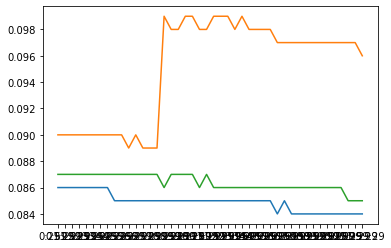

In [3]:
# starting the actual plot
import matplotlib.pyplot as plt
import numpy as np

# create a plot with the values of the column 'Replicates' of the x-axis and the values of
# the columns associated with the category '0g/L_1' of the y-axis
plt.plot(data['Kinetic read'],data[column_names_categories[('G','0g/L')]])

In [4]:
# calculate standard deviation
def get_mean_and_std(d, category):
    '''
    Calculate the mean and standard deviation of the given data.
    :param d: The relevant dataframe
    :param category: The intended category of the data
    :return: The mean and standard deviation
    '''
    deviation = np.std(d[column_names_categories[category]], axis=1)
    mean = np.mean(d[column_names_categories[category]], axis=1)
    return mean, deviation

In [50]:
# Plot of the average with error bars
def create_subplots(params):
    # Initialize 28 subplots (7 by 4) that share the x anf y values
    fig, axs = plt.subplots(7,4, sharex=True, sharey=True, figsize=(12,12))
    
    data = params['data']
    categories= params['categories']
    
    # For each category, create plot the average and std
    for i, category in enumerate(categories):
        # determining which ax-index is needed for the current plot
        y_ax = int(i/4)
        x_ax = i%4
        print(f"x_ax: {x_ax}, y_ax:{y_ax}")
        mean, deviation = get_mean_and_std(data, category)

        # plot the mean line of the data
        axs[y_ax,x_ax].plot(data['Kinetic read'], mean, 'k-')

        # added the standard deviation to the plot (assuming normally distributed data)
        axs[y_ax,x_ax].fill_between(data['Kinetic read'], mean-deviation, mean+deviation)

        # Rotate the labels on the x-axis
        axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))

        # Add gridlines
        axs[y_ax,x_ax].yaxis.grid()

        # Add a title to the subplot
        axs[y_ax,x_ax].set_title(category)
    # set labels for x and y axis
    plt.setp(axs[-1, :], xlabel='Time')
    plt.setp(axs[:, 0], ylabel=params['ylabel'])

    # Add title to the main figure
    plt.suptitle(params['title'], fontsize=16)

    # Set the y-limit for all graphs to be the same
    plt.ylim(params['ylim'])

    # Safe the figure as a .png
    plt.savefig(params['file name'])

    # Show the figure in the IDE
    plt.show()

x_ax: 0, y_ax:0
x_ax: 1, y_ax:0
x_ax: 2, y_ax:0
x_ax: 3, y_ax:0


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 0, y_ax:1


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:1
x_ax: 2, y_ax:1
x_ax: 3, y_ax:1
x_ax: 0, y_ax:2


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:2
x_ax: 2, y_ax:2
x_ax: 3, y_ax:2
x_ax: 0, y_ax:3


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:3
x_ax: 2, y_ax:3
x_ax: 3, y_ax:3
x_ax: 0, y_ax:4


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:4
x_ax: 2, y_ax:4
x_ax: 3, y_ax:4
x_ax: 0, y_ax:5


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:5
x_ax: 2, y_ax:5
x_ax: 3, y_ax:5
x_ax: 0, y_ax:6


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:6
x_ax: 2, y_ax:6
x_ax: 3, y_ax:6


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


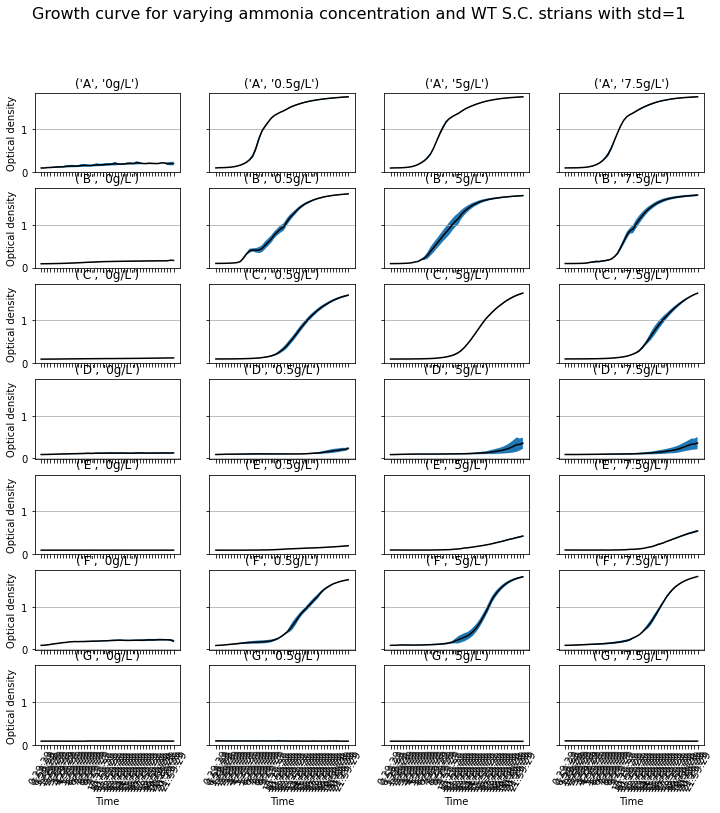

In [51]:
params = {
    'data': data,
    'categories': categories,
    'file name': "Growth_curve",
    'ylim': None,
    'ylabel': 'Optical density',
    'title': "Growth curve for varying ammonia concentration and WT S.C. strians with std=1"
}
create_subplots(params)

## Growth rate calculations

In [42]:
# np.gradient()
df = pd.DataFrame(data)
  
# Remove three columns as index base
df.drop(df.columns[[0]], axis = 1, inplace = True)

deriv = pd.DataFrame(np.gradient(df, axis=0), columns=df.columns)

deriv_2 = pd.DataFrame(np.gradient(deriv, axis=0), columns=df.columns)
#print(deriv_2)
deriv['Kinetic read'] = data['Kinetic read']
deriv_2['Kinetic read'] = data['Kinetic read']

x_ax: 0, y_ax:0
x_ax: 1, y_ax:0
x_ax: 2, y_ax:0
x_ax: 3, y_ax:0


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 0, y_ax:1


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:1
x_ax: 2, y_ax:1
x_ax: 3, y_ax:1
x_ax: 0, y_ax:2


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:2
x_ax: 2, y_ax:2
x_ax: 3, y_ax:2
x_ax: 0, y_ax:3


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:3
x_ax: 2, y_ax:3
x_ax: 3, y_ax:3
x_ax: 0, y_ax:4


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:4
x_ax: 2, y_ax:4
x_ax: 3, y_ax:4
x_ax: 0, y_ax:5


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:5
x_ax: 2, y_ax:5
x_ax: 3, y_ax:5
x_ax: 0, y_ax:6


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:6
x_ax: 2, y_ax:6
x_ax: 3, y_ax:6


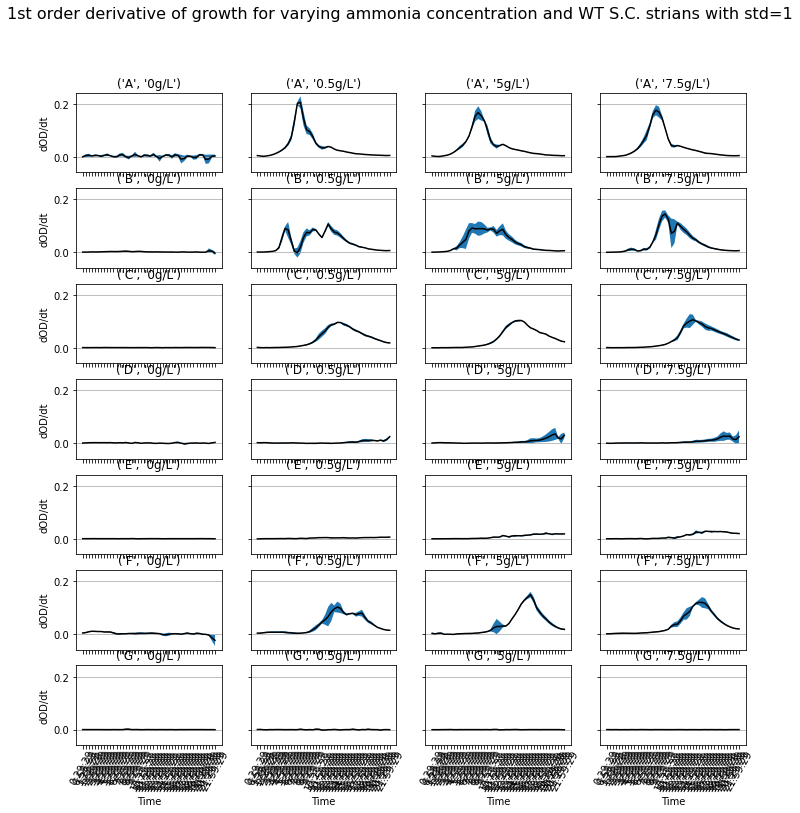

In [53]:
params = {
    'data': deriv,
    'categories': categories,
    'file name': "1st_order_derivative",
    'ylim': None,
    'ylabel': 'dOD/dt',
    'title': "1st order derivative of growth for varying ammonia concentration and WT S.C. strians with std=1"
}

create_subplots(params)

x_ax: 0, y_ax:0
x_ax: 1, y_ax:0
x_ax: 2, y_ax:0
x_ax: 3, y_ax:0


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 0, y_ax:1


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:1
x_ax: 2, y_ax:1
x_ax: 3, y_ax:1
x_ax: 0, y_ax:2


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:2
x_ax: 2, y_ax:2
x_ax: 3, y_ax:2
x_ax: 0, y_ax:3


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 1, y_ax:3
x_ax: 2, y_ax:3
x_ax: 3, y_ax:3
x_ax: 0, y_ax:4
x_ax: 1, y_ax:4


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 2, y_ax:4
x_ax: 3, y_ax:4
x_ax: 0, y_ax:5
x_ax: 1, y_ax:5


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 2, y_ax:5
x_ax: 3, y_ax:5
x_ax: 0, y_ax:6
x_ax: 1, y_ax:6


/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_6826/584441887.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Kinetic read'], rotation = 60, ha="center", position=(0.0,0.05))


x_ax: 2, y_ax:6
x_ax: 3, y_ax:6


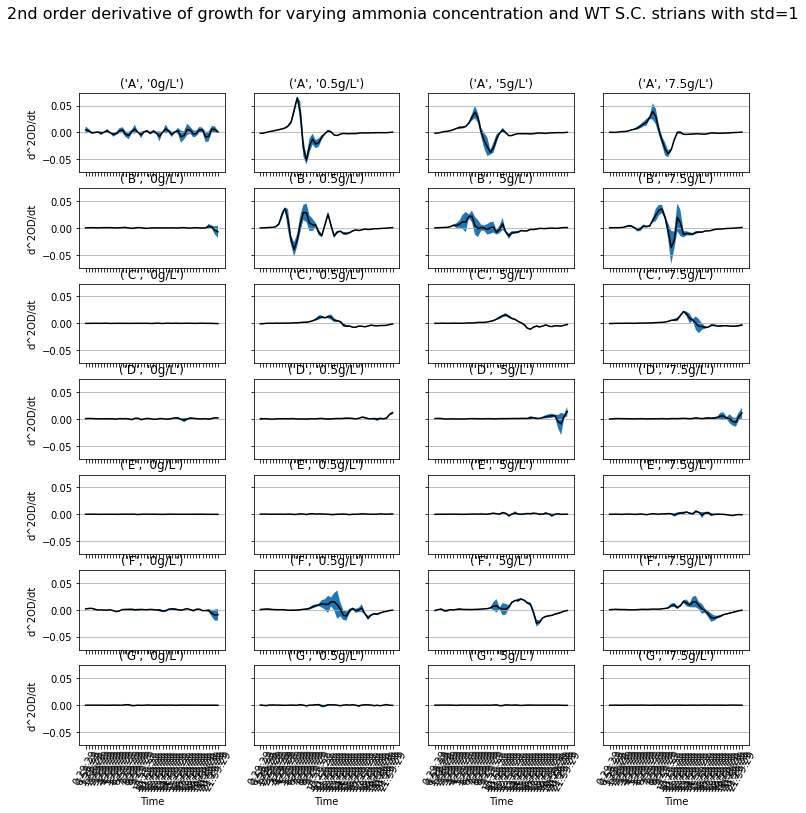

In [52]:
params = {
    'data': deriv_2,
    'categories': categories,
    'file name': "2nd_order_derivative",
    'ylim': None,
    'ylabel': 'd^2OD/dt',
    'title': "2nd order derivative of growth for varying ammonia concentration and WT S.C. strians with std=1"
}

create_subplots(params)